In [168]:
import mysql.connector
from mysql.connector import errorcode
import config4
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.power import TTestIndPower

#### Setting up the cursor to the mySQL database

In [193]:
db_name = "music_info"
cnx = mysql.connector.connect(
    host = config4.host,
    user = config4.user,
    passwd = config4.passwd,
    database = db_name
)
cursor = cnx.cursor()

#### Creating a table in the database

In [122]:
cursor.execute("""CREATE TABLE album_details(
                id INT NOT NULL AUTO_INCREMENT,
                artist text,
                album text,
                genre text,
                label text,
                rating float,
                reviewer text,
                reviewer_position text,
                day int,
                month text,
                year int,
                primary key(id)
                )""")
cnx.commit()

## Below is the code to scrape the data from pitchfork

In [11]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}

In [12]:
def get_page(url):
    """will return an error message if we don't get a 200 response"""
    try:
        page = requests.get(url, headers = headers, timeout=5)
    # include code to do status check
        if page.status_code != 200:
            print(page.status_code)
        ##we should maybe add the url to a list?
    except requests.ConnectionError as e:
        print("OOPS!! Connection Error. Make sure you are connected to Internet. Technical Details given below.\n")
        print(str(e))
    except requests.Timeout as e:
        print("OOPS!! Timeout Error")
        print(str(e))
    except requests.RequestException as e:
        print("OOPS!! General Error")
        print(str(e))
    except KeyboardInterrupt:
        print("Someone closed the program")

#### Getting links to each album using beautiful soup

In [77]:
def get_links(start, end):
    """function used to go through each page, inputting a starting and ending page,
    and pull the links to each album on that page. Returns a list of the links"""
    links=[]
    i = start
    while i <= end:
        url = 'https://pitchfork.com/reviews/albums/?page='
        time.sleep(2)
        url = f'{url}{i}'
        print(url)
        get_page(url) #this will let me know if there's an error
        page = requests.get(url)
        print(page)
        soup = BS(page.content, 'html.parser')
        links.extend([link['href'] for link in soup.findAll('a', {'class': 'review__link'})])
        i += 1
    return links

Here we decided to get the links 50 pages at a time.

In [133]:
links_1 = get_links(1, 50)
links_2 = get_links(51, 100)
links_3 = get_links(101, 150)
links_4 = get_links(151, 200)
links_5 = get_links(201, 250)
links_6 = get_links(251, 300)
links_7 = get_links(301, 350)
links_8 = get_links(351, 400)
links_9 = get_links(401, 450)
links_10 = get_links(451, 500)
links_11 = get_links(501, 550)
links_12 = get_links(551, 580)

https://pitchfork.com/reviews/albums/?page=51
<Response [200]>
https://pitchfork.com/reviews/albums/?page=52
<Response [200]>
https://pitchfork.com/reviews/albums/?page=53
<Response [200]>
https://pitchfork.com/reviews/albums/?page=54
<Response [200]>
https://pitchfork.com/reviews/albums/?page=55
<Response [200]>
https://pitchfork.com/reviews/albums/?page=56
<Response [200]>
https://pitchfork.com/reviews/albums/?page=57
<Response [200]>
https://pitchfork.com/reviews/albums/?page=58
<Response [200]>
https://pitchfork.com/reviews/albums/?page=59
<Response [200]>
https://pitchfork.com/reviews/albums/?page=60
<Response [200]>
https://pitchfork.com/reviews/albums/?page=61
<Response [200]>
https://pitchfork.com/reviews/albums/?page=62
<Response [200]>
https://pitchfork.com/reviews/albums/?page=63
<Response [200]>
https://pitchfork.com/reviews/albums/?page=64
<Response [200]>
https://pitchfork.com/reviews/albums/?page=65
<Response [200]>
https://pitchfork.com/reviews/albums/?page=66
<Response

https://pitchfork.com/reviews/albums/?page=158
<Response [200]>
https://pitchfork.com/reviews/albums/?page=159
<Response [200]>
https://pitchfork.com/reviews/albums/?page=160
OOPS!! Timeout Error
HTTPSConnectionPool(host='pitchfork.com', port=443): Read timed out. (read timeout=5)
<Response [200]>
https://pitchfork.com/reviews/albums/?page=161
<Response [200]>
https://pitchfork.com/reviews/albums/?page=162
<Response [200]>
https://pitchfork.com/reviews/albums/?page=163
<Response [200]>
https://pitchfork.com/reviews/albums/?page=164
<Response [200]>
https://pitchfork.com/reviews/albums/?page=165
<Response [200]>
https://pitchfork.com/reviews/albums/?page=166
<Response [200]>
https://pitchfork.com/reviews/albums/?page=167
<Response [200]>
https://pitchfork.com/reviews/albums/?page=168
OOPS!! Timeout Error
HTTPSConnectionPool(host='pitchfork.com', port=443): Read timed out. (read timeout=5)
<Response [200]>
https://pitchfork.com/reviews/albums/?page=169
<Response [200]>
https://pitchfork.

<Response [200]>
https://pitchfork.com/reviews/albums/?page=283
<Response [200]>
https://pitchfork.com/reviews/albums/?page=284
<Response [200]>
https://pitchfork.com/reviews/albums/?page=285
<Response [200]>
https://pitchfork.com/reviews/albums/?page=286
<Response [200]>
https://pitchfork.com/reviews/albums/?page=287
<Response [200]>
https://pitchfork.com/reviews/albums/?page=288
<Response [200]>
https://pitchfork.com/reviews/albums/?page=289
<Response [200]>
https://pitchfork.com/reviews/albums/?page=290
<Response [200]>
https://pitchfork.com/reviews/albums/?page=291
<Response [200]>
https://pitchfork.com/reviews/albums/?page=292
<Response [200]>
https://pitchfork.com/reviews/albums/?page=293
<Response [200]>
https://pitchfork.com/reviews/albums/?page=294
<Response [200]>
https://pitchfork.com/reviews/albums/?page=295
<Response [200]>
https://pitchfork.com/reviews/albums/?page=296
<Response [200]>
https://pitchfork.com/reviews/albums/?page=297
<Response [200]>
https://pitchfork.com/r

<Response [200]>
https://pitchfork.com/reviews/albums/?page=408
<Response [200]>
https://pitchfork.com/reviews/albums/?page=409
<Response [200]>
https://pitchfork.com/reviews/albums/?page=410
<Response [200]>
https://pitchfork.com/reviews/albums/?page=411
<Response [200]>
https://pitchfork.com/reviews/albums/?page=412
<Response [200]>
https://pitchfork.com/reviews/albums/?page=413
<Response [200]>
https://pitchfork.com/reviews/albums/?page=414
<Response [200]>
https://pitchfork.com/reviews/albums/?page=415
<Response [200]>
https://pitchfork.com/reviews/albums/?page=416
<Response [200]>
https://pitchfork.com/reviews/albums/?page=417
<Response [200]>
https://pitchfork.com/reviews/albums/?page=418
<Response [200]>
https://pitchfork.com/reviews/albums/?page=419
<Response [200]>
https://pitchfork.com/reviews/albums/?page=420
<Response [200]>
https://pitchfork.com/reviews/albums/?page=421
<Response [200]>
https://pitchfork.com/reviews/albums/?page=422
<Response [200]>
https://pitchfork.com/r

<Response [200]>
https://pitchfork.com/reviews/albums/?page=535
<Response [200]>
https://pitchfork.com/reviews/albums/?page=536
<Response [200]>
https://pitchfork.com/reviews/albums/?page=537
<Response [200]>
https://pitchfork.com/reviews/albums/?page=538
OOPS!! Timeout Error
HTTPSConnectionPool(host='pitchfork.com', port=443): Read timed out. (read timeout=5)
<Response [200]>
https://pitchfork.com/reviews/albums/?page=539
<Response [200]>
https://pitchfork.com/reviews/albums/?page=540
<Response [200]>
https://pitchfork.com/reviews/albums/?page=541
<Response [200]>
https://pitchfork.com/reviews/albums/?page=542
<Response [200]>
https://pitchfork.com/reviews/albums/?page=543
<Response [200]>
https://pitchfork.com/reviews/albums/?page=544
<Response [200]>
https://pitchfork.com/reviews/albums/?page=545
<Response [200]>
https://pitchfork.com/reviews/albums/?page=546
<Response [200]>
https://pitchfork.com/reviews/albums/?page=547
<Response [200]>
https://pitchfork.com/reviews/albums/?page=5

In [136]:
# confirming how many links we have
len(links_11)

600

Now we need to go to each of those links and get the info we need

In [161]:
def get_album_info(list_urls):
    """this function takes in a list of url endings
    then uses beautiful soup to extract the information that is needed from each of those links
    it then cleans the info and puts it in a tuple and inserts into mySQL database each time."""
    i = 1
    for url_end in list_urls:
        url = 'https://pitchfork.com'+url_end
        print(i)
        print(url)
        get_page(url)
        page = requests.get(url)
#         print(page)
        soup = BS(page.content, 'html.parser')
        # for each of the items we want to pull there is a potential that it's not there so we account for that with the for loops
        if soup.find(class_ = 'pub-date').get_text().split(' ')[1] == 'hrs':
            continue
        if not soup.find(class_ = 'artist-links artist-list single-album-tombstone__artist-links'):
            artist = None
        else:
            artist = soup.find(class_ = 'artist-links artist-list single-album-tombstone__artist-links').get_text()
        if not soup.find(class_ = 'single-album-tombstone__review-title'):
            album_title = None
        else:
            album_title = soup.find(class_ = 'single-album-tombstone__review-title').get_text()
        if not soup.find(class_ = 'genre-list__link'):
            genre = None
        else:
            genre = soup.find(class_ = 'genre-list__link').get_text()
        if not soup.find(class_ = 'labels-list__item'):
            label = None
        else:
            label = soup.find(class_ = 'labels-list__item').get_text()
        if not soup.find(class_ = 'score-circle'):
            rating = None
        else:
            rating = float(soup.find(class_ = 'score-circle').get_text())
        if not soup.find(class_ = 'authors-detail__display-name'):
            reviewer = None
        else:
            reviewer = soup.find(class_ = 'authors-detail__display-name').get_text()
        if not soup.find(class_ = 'authors-detail__title'):
            reviewer_position = None
        else:
            reviewer_position = soup.find(class_ = 'authors-detail__title').get_text()
        if not soup.find(class_ = 'pub-date'):
            day = None
            month = None
            year = None
        else:
            day = int(soup.find(class_ = 'pub-date').get_text().split(' ')[1])
            month = soup.find(class_ = 'pub-date').get_text().split(' ')[0]
            year = int(soup.find(class_ = 'pub-date').get_text().split(' ')[2])
        table_info = (artist, album_title, genre, label, rating, reviewer, reviewer_position, day, month, year)
        # here we add the info into the database in mySQL
        stmt = """INSERT INTO album_details(artist, album, genre, label, rating, reviewer, reviewer_position, day, month, year) 
             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

        cursor.execute(stmt, table_info)
        cnx.commit()
#         print(table_info)
        i += 1
        if i % 2:
            time.sleep(2)

In [160]:
# I decided to manually run this for each of my links to watch for potential errors/timeouts/kicked off website
get_album_info(DONT_RUN_AGAIN)

https://pitchfork.com/reviews/albums/19191-impetuous-ritual-unholy-congregation-of-hypocritical-ambivalence/
0
https://pitchfork.com/reviews/albums/19187-ghetto-ghouls-ghetto-ghouls/
1
https://pitchfork.com/reviews/albums/19154-amps-for-christ-canyons-cars-and-crows/
2
https://pitchfork.com/reviews/albums/19235-the-both-the-both/
3
https://pitchfork.com/reviews/albums/19205-woods-with-light-and-with-love/
4
https://pitchfork.com/reviews/albums/19155-triptykon-melana-chasmata/
5
https://pitchfork.com/reviews/albums/18858-deleted-scenes-lithium-burn/
6
https://pitchfork.com/reviews/albums/19210-downliners-sekt-silent-ascent/
7
https://pitchfork.com/reviews/albums/19209-school-of-language-old-fears/
8
https://pitchfork.com/reviews/albums/19250-girl-talk-freeway-broken-ankles-ep/
9
https://pitchfork.com/reviews/albums/19188-tweens-tweens/
10
https://pitchfork.com/reviews/albums/19225-golden-retriever-seer/
11
https://pitchfork.com/reviews/albums/19223-cute-heels-spiritual/
12
https://pitch

https://pitchfork.com/reviews/albums/19103-trust-joyland/
109
https://pitchfork.com/reviews/albums/19132-posse-soft-opening/
110
https://pitchfork.com/reviews/albums/19095-donato-dozzy-nuel-voices-from-the-lake-the-aquaplano-sessions-velo-di-maya-ep/
111
https://pitchfork.com/reviews/albums/19108-elbow-the-take-off-and-landing-of-everything/
112
https://pitchfork.com/reviews/albums/19090-unwound-rat-conspiracy/
113
https://pitchfork.com/reviews/albums/18930-freddie-gibbs-and-madlib-pinata/
114
https://pitchfork.com/reviews/albums/19085-dodsferd-the-parasitic-survival-of-the-human-race/
115
https://pitchfork.com/reviews/albums/19084-benedek-untitled-ep/
116
https://pitchfork.com/reviews/albums/19063-peter-walker-bob-frank-second-poem-to-karmela-or-gypsies-are-important-bob-frank/
117
https://pitchfork.com/reviews/albums/19072-young-money-rise-of-an-empire/
118
https://pitchfork.com/reviews/albums/19098-dean-wareham-dean-wareham/
119
https://pitchfork.com/reviews/albums/19000-tensnake-gl

https://pitchfork.com/reviews/albums/18976-shackleton-freezing-thawing-opening-ep/
217
https://pitchfork.com/reviews/albums/18989-crosses-/
218
https://pitchfork.com/reviews/albums/18935-speedy-ortiz-real-hair-ep/
219
https://pitchfork.com/reviews/albums/19002-dog-bite-tranquilizers/
220
https://pitchfork.com/reviews/albums/18982-foetus-jg-thirlwell-soak-the-blue-eyes-ost/
221
https://pitchfork.com/reviews/albums/18984-modern-baseball-youre-gonna-miss-it-all/
222
https://pitchfork.com/reviews/albums/18947-hardcore-traxx-dance-mania-records-1986-1997/
223
https://pitchfork.com/reviews/albums/18922-cibo-matto-hotel-valentine/
224
https://pitchfork.com/reviews/albums/18951-thumpers-galore/
225
https://pitchfork.com/reviews/albums/18916-gridlink-longhena/
226
https://pitchfork.com/reviews/albums/18991-total-slacker-slip-away/
227
https://pitchfork.com/reviews/albums/18909-tinariwen-emmaar/
228
https://pitchfork.com/reviews/albums/18907-katy-b-little-red/
229
https://pitchfork.com/reviews/a

https://pitchfork.com/reviews/albums/18886-cybotron-enter/
323
https://pitchfork.com/reviews/albums/18890-disclosure-settle-the-remixes/
324
https://pitchfork.com/reviews/albums/18850-lanterns-on-the-lake-until-the-colours-run/
325
https://pitchfork.com/reviews/albums/18849-blank-realm-grassed-inn/
326
https://pitchfork.com/reviews/albums/18879-roc-marciano-marci-beaucoup/
327
https://pitchfork.com/reviews/albums/18837-ariel-pink-early-live-recordings/
328
https://pitchfork.com/reviews/albums/18833-bruce-springsteen-high-hopes/
329
https://pitchfork.com/reviews/albums/18829-sick-thoughts-terminal-teen-age/
330
https://pitchfork.com/reviews/albums/18809-big-business-battlefields-forever/
331
https://pitchfork.com/reviews/albums/18873-self-defense-family-try-me/
332
https://pitchfork.com/reviews/albums/18876-angel-haze-dirty-gold/
333
https://pitchfork.com/reviews/albums/18875-pixies-ep-2/
334
https://pitchfork.com/reviews/albums/18872-dudley-perkins-dr-stokley/
335
https://pitchfork.com

________________________________________

### Now we begin to query the database

In [175]:
cursor.execute("""SELECT AVG(rating) as avg_rating, month
                    FROM music_info.album_details
                    GROUP BY month""")

In [176]:
#quick look at the average ratings
df_avg_ratings = pd.DataFrame(cursor.fetchall())
df_avg_ratings.columns = [x[0] for x in cursor.description]
df_avg_ratings

,avg_rating,month
0,7.212864,April
1,7.129139,August
2,7.192734,December
3,7.138525,February
4,7.166545,January
5,7.174709,July
6,7.224615,June
7,7.215305,March
8,7.299542,May
9,7.273760,November


<BarContainer object of 12 artists>

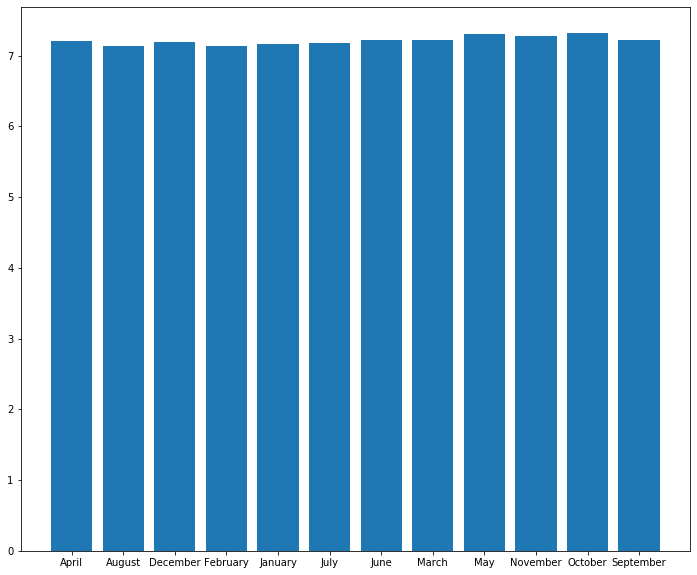

In [190]:
plt.figure(figsize=(12,10))
plt.bar(x_data, y_data)

#### I want to check my sample size for each month

In [191]:
cursor.execute("""SELECT COUNT(rating) as no_of_rating, month
                    FROM music_info.album_details
                    GROUP BY month""")

In [183]:
df_count_ratings = pd.DataFrame(cursor.fetchall())
df_count_ratings.columns = [x[0] for x in cursor.description]
df_count_ratings

,no_of_rating,month
0,653,April
1,604,August
2,289,December
3,610,February
4,550,January
5,601,July
6,650,June
7,673,March
8,655,May
9,484,November


### Now I make a data frame that I'm going to use for all my data

In [240]:
cursor.execute("""SELECT artist, album, genre, label, rating, day, month, year
                    FROM music_info.album_details
                    """)
df_info = pd.DataFrame(cursor.fetchall())
df_info.columns = [x[0] for x in cursor.description]
df_info.sample(10)

,artist,album,genre,label,rating,day,month,year
74,Lil Tecca,We Love You Tecca,Rap,Galactic,5.6,10,September,2019
2940,Cabo Boing,Blob on a Grid,Experimental,Haord,7.5,5,May,2017
3518,Peter Stampfel,Holiday for Strings,Folk/Country,Don Giovanni,7.9,14,November,2016
4850,Dilly Dally,Sore,Rock,Partisan,8.0,9,October,2015
3050,Show Me the Body,Corpus I,Rock,Corpus,6.0,5,April,2017
165,Jadu Heart,Melt Away,Pop/R&B,VLF Records,5.8,13,August,2019
5017,Gonno,Remember the Life Is Beautiful,Electronic,Endless Flight,7.6,17,August,2015
3379,Yotam Avni,Tehillim,Electronic,Stroboscopic Artefacts,7.0,5,January,2017
471,Lydia Ainsworth,Phantom Forest,Experimental,self-released,7.0,13,May,2019
4821,Joanna Newsom,Divers,Folk/Country,Drag City,8.5,19,October,2015


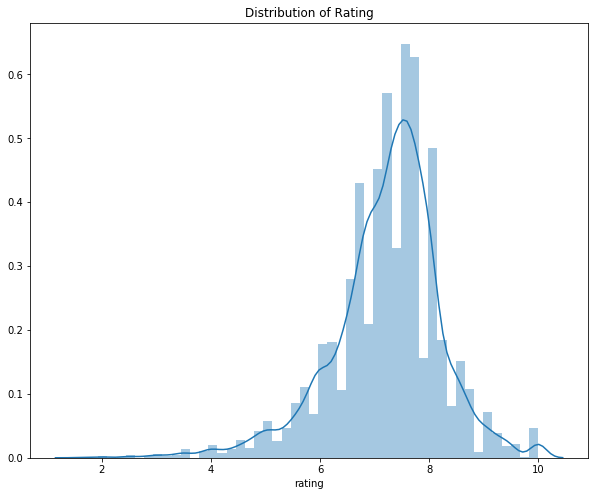

In [306]:
fig = plt.figure(figsize=(10, 8))
ax = sns.distplot(df_info['rating']).set_title('Distribution of Rating')

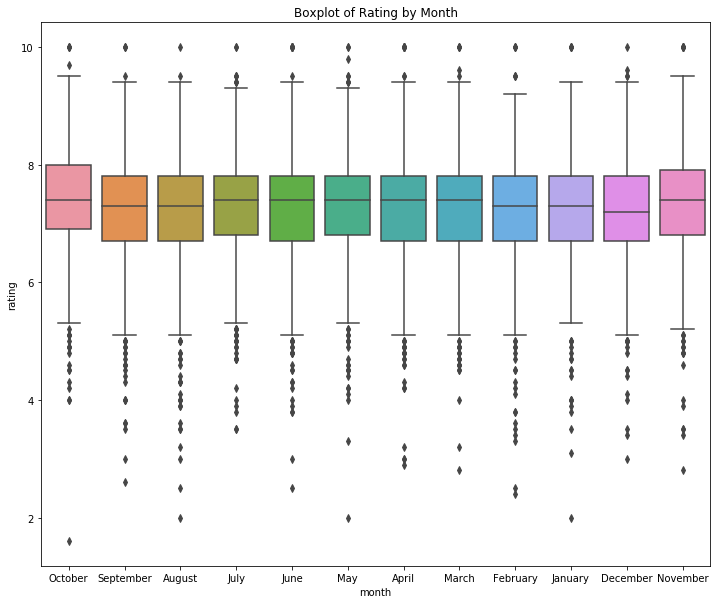

In [304]:
fig = plt.figure(figsize=(12, 10))
ax = sns.boxplot(x='month', y='rating', data=df_info).set_title('Boxplot of Rating by Month')

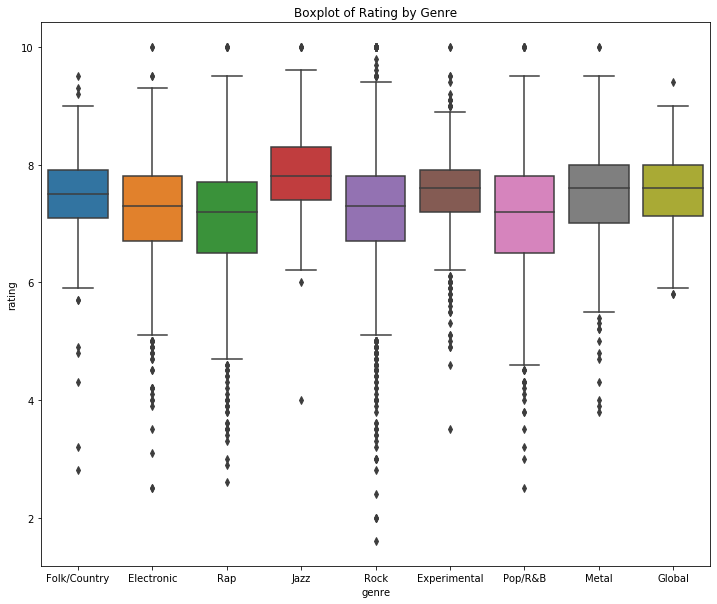

In [305]:
fig = plt.figure(figsize=(12, 10))
ax = sns.boxplot(x='genre', y='rating', data=df_info).set_title('Boxplot of Rating by Genre')

In [296]:
df_info.groupby(['genre']).describe()

rating                                                     day  \
               count      mean       std  min    25%  50%  75%   max   count   
genre                                                                          
Electronic    1164.0  7.169072  0.900801  2.5  6.700  7.3  7.8  10.0  1164.0   
Experimental   646.0  7.495666  0.729349  3.5  7.200  7.6  7.9  10.0   646.0   
Folk/Country   262.0  7.425954  0.798858  2.8  7.100  7.5  7.9   9.5   262.0   
Global          66.0  7.524242  0.787413  5.8  7.125  7.6  8.0   9.4    66.0   
Jazz           152.0  7.848684  0.835946  4.0  7.400  7.8  8.3  10.0   152.0   
Metal          277.0  7.407942  0.920032  3.8  7.000  7.6  8.0  10.0   277.0   
Pop/R&B        684.0  7.110526  1.121169  2.5  6.500  7.2  7.8  10.0   684.0   
Rap            973.0  7.004625  1.057595  2.6  6.500  7.2  7.7  10.0   973.0   
Rock          2186.0  7.201784  1.081740  1.6  6.700  7.3  7.8  10.0  2186.0   

                         ...                 year                         \
                   mean  ...    75%   max   count         mean       std   
genre                    ...                                               
Electronic    15.402062  ...  23.00  31.0  1164.0  2016.333333  1.602520   
Experimental  15.811146  ...  23.00  31.0   646.0  2016.696594  1.580174   
Folk/Country  16.301527  ...  24.00  31.0   262.0  2016.583969  1.641946   
Global        14.727273  ...  22.75  31.0    66.0  2016.515152  1.361475   
Jazz          15.881579  ...  24.00  31.0   152.0  2017.052632  1.417906   
Metal         15.703971  ...  23.00  31.0   277.0  2016.122744  1.553195   
Pop/R&B       15.900585  ...  23.00  31.0   684.0  2016.757310  1.608776   
Rap           15.840699  ...  24.00  31.0   973.0  2016.772867  1.534515   
Rock          15.210430  ...  22.00  31.0  2186.0  2016.436871  1.632590   

                                                       
                 min      25%     50%     75%     max  
genre                                                  
Electronic    2013.0  2015.00  2016.0  2018.0  2019.0  
Experimental  2014.0  2015.25  2017.0  2018.0  2019.0  
Folk/Country  2014.0  2015.00  2017.0  2018.0  2019.0  
Global        2014.0  2016.00  2017.0  2017.0  2019.0  
Jazz          2013.0  2016.00  2017.0  2018.0  2019.0  
Metal         2014.0  2015.00  2016.0  2017.0  2019.0  
Pop/R&B       2014.0  2015.00  2017.0  2018.0  2019.0  
Rap           2014.0  2016.00  2017.0  2018.0  2019.0  
Rock          2014.0  2015.00  2016.0  2018.0  2019.0  

[9 rows x 24 columns]

In [203]:
cursor.execute("""SELECT AVG(rating) as avg_rating, genre
                    FROM music_info.album_details
                    GROUP BY genre
                    """)
df_rating_genre = pd.DataFrame(cursor.fetchall())
df_rating_genre.columns = [x[0] for x in cursor.description]
df_rating_genre

,avg_rating,genre
0,7.110076,None
1,7.169072,Electronic
2,7.496754,Experimental
3,7.425954,Folk/Country
4,7.524242,Global
5,7.848684,Jazz
6,7.407942,Metal
7,7.110526,Pop/R&B
8,7.008784,Rap
9,7.201784,Rock


In [208]:
df_rating_genre.drop(df_rating_genre.index[0], inplace=True)

In [209]:
df_rating_genre

,avg_rating,genre
1,7.169072,Electronic
2,7.496754,Experimental
3,7.425954,Folk/Country
4,7.524242,Global
5,7.848684,Jazz
6,7.407942,Metal
7,7.110526,Pop/R&B
8,7.008784,Rap
9,7.201784,Rock


<BarContainer object of 9 artists>

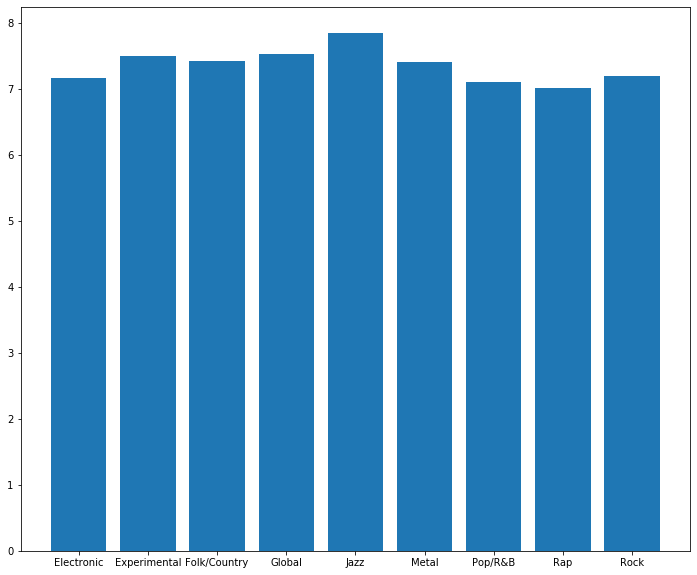

In [210]:
plt.figure(figsize=(12,10))
plt.bar(df_rating_genre.genre, df_rating_genre.avg_rating)

#### Going to conver the dates into datetimes

In [212]:
from datetime import datetime

s = "March"
d = datetime.strptime(s, '%d %B, %Y')
print(d.strftime('%Y-%m-%d'))

<generator object <genexpr> at 0x1a245fdc78>


In [220]:
df_info['date'] = df_info["day"].map(str) + ' ' + df_info["month"] + ' ' + df_info["year"].map(str)

In [228]:
df_info.head()

,artist,album,genre,label,rating,day,month,year,date
0,Sturgill Simpson,SOUND & FURY,Folk/Country,Elektra,7.2,1,1900-10-01,2019,2019-10-01
1,Telefon Tel Aviv,Dreams Are Not Enough,Electronic,Ghostly International,8.1,1,1900-10-01,2019,2019-10-01
2,Somos,Prison on a Hill,None,Tiny Engines,7.4,1,1900-10-01,2019,2019-10-01
3,Thaiboy Digital,Legendary Member,Rap,YEAR0001,7.2,1,1900-10-01,2019,2019-10-01
4,John Coltrane,Blue World,Jazz,Impulse!,8.4,30,1900-09-01,2019,2019-09-30


In [223]:
df_info['date'] = pd.to_datetime(df_info['date'], format = '%d %B %Y')

In [226]:
df_info['month'] = pd.to_datetime(df_info['month'], format = '%B')

In [243]:
df_info.head()

,artist,album,genre,label,rating,day,month,year
0,Sturgill Simpson,SOUND & FURY,Folk/Country,Elektra,7.2,1,October,2019
1,Telefon Tel Aviv,Dreams Are Not Enough,Electronic,Ghostly International,8.1,1,October,2019
2,Somos,Prison on a Hill,None,Tiny Engines,7.4,1,October,2019
3,Thaiboy Digital,Legendary Member,Rap,YEAR0001,7.2,1,October,2019
4,John Coltrane,Blue World,Jazz,Impulse!,8.4,30,September,2019


# Statistical testing on the data

In [245]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

#### We chose to do a one way ANOVA for each of our hypotheses

First we start with grouping by month

In [248]:
mod = ols('rating~month',data=df_info).fit()
anova_month = sm.stats.anova_lm(mod, type=2)
anova_month

,df,sum_sq,mean_sq,F,PR(>F)
month,11.0,22.806598,2.073327,2.04303,0.021099
Residual,6931.0,7033.784153,1.014830,NaN,NaN


In [247]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.043
Date:                Thu, 03 Oct 2019   Prob (F-statistic):             0.0211
Time:                        12:30:17   Log-Likelihood:                -9896.8
No. Observations:                6943   AIC:                         1.982e+04
Df Residuals:                    6931   BIC:                         1.990e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.2129      0.039    182.965      0.000       7.136       7.290
month[T.August]       -0.0837      0.057     -1.472      0.141      -0.195       0.028
month[T.December]     -0.0201      0.071     -0.283      0.777      -0.160       0.119
month[T.February]     -0.0743      0.057     -1.311      0.190      -0.186       0.037
month[T.January]      -0.0463      0.058     -0.794      0.427      -0.161       0.068
month[T.July]         -0.0382      0.057     -0.670      0.503      -0.150       0.073
month[T.June]          0.0118      0.056      0.211      0.833      -0.098       0.121
month[T.March]         0.0024      0.055      0.044      0.965      -0.106       0.111
month[T.May]           0.0867      0.056      1.556      0.120      -0.023       0.196
month[T.November]      0.0609      0.060      1.008      0.314      -0.058       0.179
month[T.October]       0.1057      0.058      1.812      0.070      -0.009       0.220
month[T.September]     0.0133      0.056      0.237      0.813      -0.097       0.124
==============================================================================
Omnibus:                     1029.240   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2512.497
Skew:                          -0.842   Prob(JB):                         0.00
Kurtosis:                       5.419   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we grouped by genre

In [307]:
# there is a small number of datapoints with no genre, we chose to drop these
df_info.dropna(inplace=True)

In [1]:
mod = ols('rating~genre',data=df_info).fit()
anova_genre = sm.stats.anova_lm(mod, type=2)
anova_genre

NameError: name 'ols' is not defined

In [293]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     24.40
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           2.57e-37
Time:                        15:20:04   Log-Likelihood:                -9057.9
No. Observations:                6410   AIC:                         1.813e+04
Df Residuals:                    6401   BIC:                         1.819e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.1691      0.029    245.854      0.000       7.112       7.226
genre[T.Experimental]     0.3266      0.049      6.691      0.000       0.231       0.422
genre[T.Folk/Country]     0.2569      0.068      3.776      0.000       0.124       0.390
genre[T.Global]           0.3552      0.126      2.821      0.005       0.108       0.602
genre[T.Jazz]             0.6796      0.086      7.921      0.000       0.511       0.848
genre[T.Metal]            0.2389      0.067      3.592      0.000       0.108       0.369
genre[T.Pop/R&B]         -0.0585      0.048     -1.221      0.222      -0.153       0.035
genre[T.Rap]             -0.1644      0.043     -3.805      0.000      -0.249      -0.080
genre[T.Rock]             0.0327      0.036      0.906      0.365      -0.038       0.103
==============================================================================
Omnibus:                      817.372   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2006.998
Skew:                          -0.734   Prob(JB):                         0.00
Kurtosis:                       5.316   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now we look at tukey HSD for each

In [286]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [289]:
print(pairwise_tukeyhsd(df_info['rating'], df_info['month']))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower  upper  reject
--------------------------------------------------------
   April    August  -0.0837    0.9 -0.2696 0.1022  False
   April  December  -0.0201    0.9 -0.2528 0.2126  False
   April  February  -0.0743    0.9 -0.2598 0.1111  False
   April   January  -0.0463    0.9 -0.2369 0.1443  False
   April      July  -0.0382    0.9 -0.2243  0.148  False
   April      June   0.0118    0.9 -0.1707 0.1942  False
   April     March   0.0024    0.9 -0.1785 0.1833  False
   April       May   0.0867    0.9 -0.0954 0.2688  False
   April  November   0.0609    0.9 -0.1366 0.2584  False
   April   October   0.1057 0.7862  -0.085 0.2965  False
   April September   0.0133    0.9 -0.1709 0.1976  False
  August  December   0.0636    0.9  -0.172 0.2992  False
  August  February   0.0094    0.9 -0.1797 0.1984  False
  August   January   0.0374    0.9 -0.1567 0.2315  False
  August      July   0.0456    

In [294]:
print(pairwise_tukeyhsd(df_info['rating'], df_info['genre']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  Electronic Experimental   0.3266  0.001  0.1751   0.478   True
  Electronic Folk/Country   0.2569 0.0051  0.0458   0.468   True
  Electronic       Global   0.3552 0.1094 -0.0354  0.7458  False
  Electronic         Jazz   0.6796  0.001  0.4134  0.9458   True
  Electronic        Metal   0.2389   0.01  0.0325  0.4452   True
  Electronic      Pop/R&B  -0.0585    0.9 -0.2073  0.0902  False
  Electronic          Rap  -0.1644 0.0045 -0.2985 -0.0304   True
  Electronic         Rock   0.0327    0.9 -0.0793  0.1447  False
Experimental Folk/Country  -0.0697    0.9 -0.2958  0.1564  False
Experimental       Global   0.0286    0.9 -0.3703  0.4275  False
Experimental         Jazz    0.353 0.0027  0.0747  0.6313   True
Experimental        Metal  -0.0877    0.9 -0.3094   0.134  False
Experimental      Pop/R&B

### Ok, now I would like to look at POWER/effect size

In [297]:
df_info.describe()

,rating,day,year
count,6410.000000,6410.000000,6410.000000
mean,7.222527,15.551950,2016.537285
std,1.009285,8.686575,1.606159
min,1.600000,1.000000,2013.000000
25%,6.700000,8.000000,2015.000000
50%,7.350000,15.000000,2017.000000
75%,7.800000,23.000000,2018.000000
max,10.000000,31.000000,2019.000000


In [301]:
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52
